# Computational Physics U24568 2024-2025

# Lecture 4b - Model Fitting

In [1]:
# Packages to import
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Data from a Periodic Star

Now that we have used 3 different techniques to find models to fit our Hubble data, let us now turn our attention to a different data set - that of a periodic star.

Below are lightcurve magnitudes for this source over a period of 4 months. Magnitude is an odd astronomy unit. It is a measure of brightness, which actually doesn't have any units, and lower magnitude indicates that an object is actually brighter!

Now let's use what we learned in the previous section and apply it to this new dataset.

In [2]:
day = np.arange(0, 120, 6) #days
mag = np.asarray([9.2, 9.3, 9.7, 9.9, 9.6, 9.8, 9.9, 9.7, 9.1, 8.8, 8.7, 8.3, 8.6, 9.1, 9.1, 9.2, 9.5, 9.9, 9.7, 9.7]) #magnitudes

**Exercise:** Plot the data, and try to fit a cosine function to the data. Does this model fit the data well. Justify your answer?

**Remember:** Low magnitude values are brighter than high magnitude values. Invert your y-axis.

R^2 = 0.4636950697
This model does not fit the data well


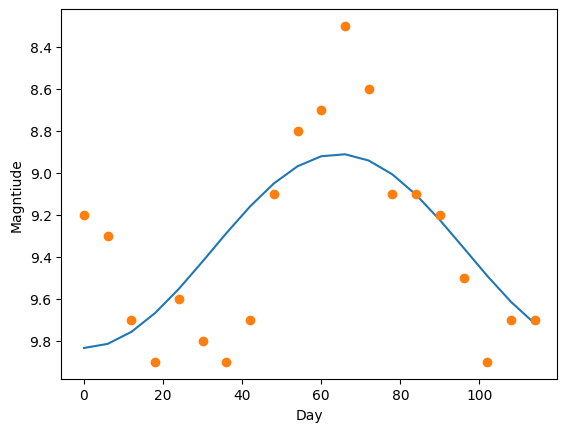

In [3]:
# Cosine model with an offset
def model(x, a, b, c):
  y = a*np.cos(b*x) + c
  return y

# Finding the parameters which describe this model
params, params_co  = curve_fit(model, day, mag)

# Find magnitude values for the model
mag_model = model(day, params[0], params[1], params[2])

# Plot the data
plt.plot(day, mag_model)
plt.plot(day, mag, 'o')
plt.gca().invert_yaxis()
plt.xlabel('Day')
plt.ylabel('Magntiude')

# Work out the residual
res = mag - mag_model

mag_bar = sum(mag)/len(mag) # Average magnitude

# Work out R^2
SS_res = sum(res**2)
SS_tot = sum((mag - mag_bar)**2)
R_sqr = 1 - (SS_res / SS_tot)

print('R^2 = {:.10f}'.format(R_sqr))
print('This model does not fit the data well')

You will see that the cosine function doesn't fit the data well.

**Exercise:** Find a polynomial model that describes the data. Which degree describes the data well without overfitting? Make a plot of the data with the model you have chosen.

**Hint:** Overfitting is really easy to do...you can keep increasing the polynomial degree to find a curve that exactly fits the data. But this is not what you want. You want a curve that generally describes the data. So instead loop over 10 degrees, and make a plot of degree against R$^2$ and find the degree value where the curve 'turn over'. i.e. at which value do you stop seeing major changes to the R$^2$ value.



R^2 = 5 or 6 fits the data well without over fitting with values 0.864963 and 0.888136


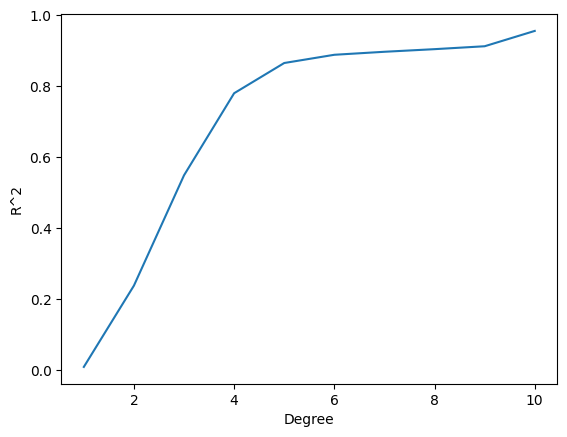

In [4]:
# Search from deg = 1-10
deg = np.arange(1,11,1)
R_all = np.zeros(len(deg))

# Loop over polynomial degree
for i, j in enumerate(deg):
  # Calculate the parameters for the degree
  pol = np.polyfit(day, mag, j)
  # Put parameters into polynomial form
  trendpoly = np.poly1d(pol)
  # Work out residuals
  res = mag - trendpoly(day)
  # Calculate R^2
  SS_res = sum(res**2)
  R_sqr = 1 - (SS_res / SS_tot)
  # Store R^2 value
  R_all[i] = R_sqr

# Make plot
plt.plot(deg, R_all)
plt.xlabel('Degree')
plt.ylabel('R^2')

print('R^2 = 5 or 6 fits the data well without over fitting with values %f and %f' % (R_all[4], R_all[5]))

R^2 for a degree=6 polynomial is 0.8881


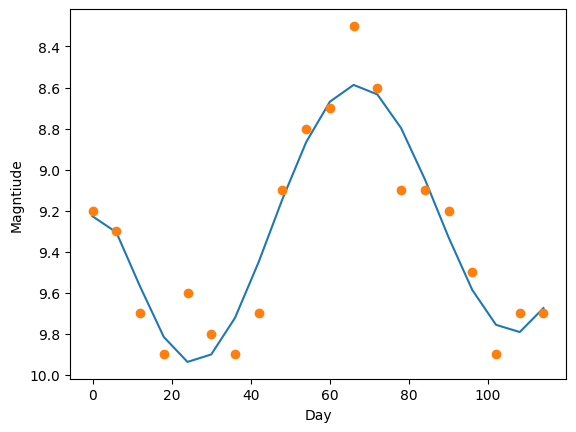

In [5]:
# Chose degree = 6
pol = np.polyfit(day, mag, 6)
# Find form of model
poly = np.poly1d(pol)

# Make plot
plt.plot(day, poly(day))
plt.plot(day, mag, 'o')
plt.gca().invert_yaxis()
plt.xlabel('Day')
plt.ylabel('Magntiude')

print('R^2 for a degree=6 polynomial is %.4f' % (R_all[5]))

We see here that the polynomial model fits the data better than the cosine model. But the data only really shows around one period of the star. Below we provide the next 100 days of the periodic star. Does this polynomial still fit the data?

In [6]:
day_all = np.arange(0, 220, 6) #days
mag_all = np.asarray([9.2, 9.3, 9.7, 9.9, 9.6, 9.8, 9.9, 9.7, 9.1, 8.8, 8.7, 8.3, 8.6, 9.0, 9.1, 9.2, 9.5, 9.9, 9.7, 9.7, 9.8, 9.6, 9.1, 8.7, 8.7, 8.4, 8.6, 9.1, 9.1, 9.2, 9.4, 9.9, 9.7, 9.8, 9.7, 9.6, 9.2]) #magnitudes

Text(0, 0.5, 'Magntiude')

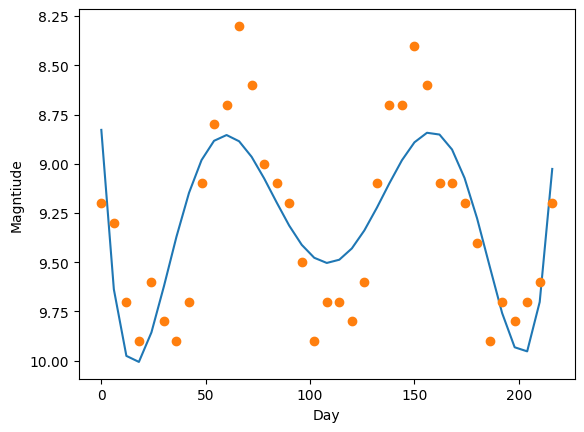

In [7]:
# Degree = 6
pol = np.polyfit(day_all, mag_all, 6)
# Find form of model
poly = np.poly1d(pol)

# Make plot
plt.plot(day_all, poly(day_all))
plt.plot(day_all, mag_all, 'o')
plt.gca().invert_yaxis()
plt.xlabel('Day')
plt.ylabel('Magntiude')



**Exercise:** Find a model which best fits this periodic data

R^2 = 0.8977282787
This model does not fit the data well


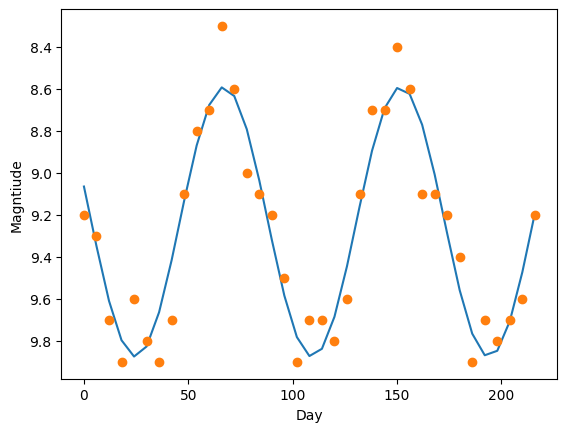

In [8]:
# Cosine model with an offset
def model(x, a, b, c, d):
  y = a*np.cos(b*x + d) + c
  return y

# Finding the initial parameters which describe this model
# Find that curve_fit needs to know the starting point to work
initial_params, _  = curve_fit(model, day, mag)

# Finding the parameters which describe this model with all the data
params, params_co  = curve_fit(model, day_all, mag_all, p0=initial_params)

# Find magnitude values for the model
mag_model = model(day_all, *params)

# Plot the data
plt.plot(day_all, mag_model)
plt.plot(day_all, mag_all, 'o')
plt.gca().invert_yaxis()
plt.xlabel('Day')
plt.ylabel('Magntiude')

# Work out the residual
res = mag_all - mag_model

mag_bar = sum(mag_all)/len(mag_all) # Average magnitude

# Work out R^2
SS_res = sum(res**2)
SS_tot = sum((mag_all - mag_bar)**2)
R_sqr = 1 - (SS_res / SS_tot)

print('R^2 = {:.10f}'.format(R_sqr))
print('This model does not fit the data well')